<a href="https://colab.research.google.com/github/ironchi/Fhdwork/blob/master/Project_2_no_show_patients_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2: Investigate a Dataset for now show patients appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id='intro'></a>
## Introduction

> A hospital in brazil has offer a dataset for analysis assessment, this dataset has several factors that might help with the assessment results. This assesses has been investigated for the reasons of patient behaviour of attending scheduled appointments or not. This investigation will walk through several factors to predict if patients will attend his appointment or not and how we could give better recommendation for enhancement.  


In [6]:
#import the necessary packages for caluclations and visualization and layout.
import pandas as pd
import numpy as np

# import matplotlib and seaborn libraries for visualization
import matplotlib as plot
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='wrangling'></a>
## Data Wrangling




### General Properties

> This section to load the data and have breif decrption about the it in dataset. once data has been loaded to data frame, you can call the head of the data by method head(). The dataset has over 100k patients records distributed on 14 columns. Then we have checked the datatype to know which data saved in these records by calling method info(). This give clear idea what we need from the dataset and we can vision the road map for this investigation.

In [7]:
# load data from csv file by using pandas library 
df = pd.read_csv('/content/noshowappointments-kagglev2-may-2016.csv')
# show the head of the dataset to see brief infomation about the coloumns 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# check the info of columns and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 #columns explanation# 
 
 0   PatientId     --> ID number of patients 
 
 1   AppointmentID --> ID number of appointments
 
 2   Gender        --> Male or Female
 
 3   ScheduledDay  -->The day of the actuallappointmen
 
 4   AppointmentDay--> Date of appointment  
 
 5   Age           --> How old is the patient
 
 6   Neighbourhood --> Where the appointment takes
place

 7   Scholarship   --> True of False for Bolsa Família provides financial aid to poor Brazilian families
 
 8   Hipertension  --> True of False
 
 9   Diabetes      --> True of False
 
 10  Alcoholism    --> True of False
 
 11  Handcap       --> True of False
 
 12  SMS_received  --> 1 or more messages sent to the patient
 
 13  No-show       --> (Yes) that means person didn't show, (No) that means patient has attend

### Data Cleaning and preparation:  

 For this section we have checked whether dataset has null values to be filled or duplicated value to be dropped. therefore we have run methods like isnull() for checking missing data and duplicated() to check wether this dataset has duplicated but haven't find anyone of these. Then I have droped unnecessary columns like PatientId and AppointmentID because they have no beneficial use for data exploration. Moreover I changed the columns names to lowercase letters and remove spaces between words to make it easier to manipulate and calculate. 

In [9]:
# check f there's any null value
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
#check the amount of duplicated values
df.duplicated().sum()

0

In [0]:
# drop two column from dataframe PatientId and AppointmentID
df.drop(columns=['PatientId','AppointmentID'], axis=1, inplace= True)

In [0]:
# convert all columns to lower case and replace spaces with undeerscor 
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [13]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I have checked if there's any negative data and I found negative value in age column, which it seems like unacceptable record for that I drop it.

In [14]:
# check if there's vale less than zero in column age
checkageseries = df.index[df['age'] < 0]

checkageseries

Int64Index([99832], dtype='int64')

In [15]:
# select the row for validation 
df.iloc[99832]

gender                               F
scheduledday      2016-06-06T08:58:13Z
appointmentday    2016-06-06T00:00:00Z
age                                 -1
neighbourhood                    ROMÃO
scholarship                          0
hipertension                         0
diabetes                             0
alcoholism                           0
handcap                              0
sms_received                         0
no-show                             No
Name: 99832, dtype: object

In [0]:
# drop the row with negative value by using index 
df.drop(df.index[99832], inplace=True)

In [17]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The data type in columns scheduledday and appointmentday need to be changed, I have change them to datetime. This format will make it easer to understand.

In [0]:
# Change the datatype of columns to datetime 
df['scheduledday'] = df['scheduledday'].astype('datetime64[ns]')
df['appointmentday'] = df['appointmentday'].astype('datetime64[ns]')

I change the datatype of column no-show from object to int with replace (Yes) to 1 and (No) to 0.

In [0]:
# Change the value of Yes to 1 and value of No to 0
df['no-show'].replace('No', 0, inplace=True)
df['no-show'].replace('Yes', 1, inplace=True)

In [0]:
# change the datatype of column no-show from string to int
df['no-show'] = df['no-show'].astype('int64')

In [21]:
# check the result after changing 
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0


Moreover, I will add another column to categories the age to be devided over four categories. This going to be very hepful during exploration.

In [22]:
# create the labels for age 
pd.cut(df.age,bins=[0,2,17,65,99],labels=['Toddler/Baby','Child','Adult','Elderly'])

0         Adult
1         Adult
2         Adult
3         Child
4         Adult
          ...  
110522    Adult
110523    Adult
110524    Adult
110525    Adult
110526    Adult
Name: age, Length: 110526, dtype: category
Categories (4, object): [Toddler/Baby < Child < Adult < Elderly]

In [0]:
# Save the new valuse in variable category and insert into column age group. 
category = pd.cut(df.age,bins=[0,2,17,65,99],labels=['Toddler/baby','Child','Adult','Elderly'])
df.insert(5,'age_group',category)

In [24]:
# See the changes by head only one row
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,age_group,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,Adult,0,1,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis:


### Research Question 1: does the age and gender have relative relation with patients to make them not show for their appointments?

I have decided to start with gender and age, those two columns have very clear attributes to start with. based on those values I will discover a proper approach to find the relationships between others, which is going to have very good impact on finding.

In [25]:
# Start by looking at the head of dataframe.
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,age_group,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,Adult,0,1,0,0,0,0,0


For first look on describe table, you can observe that approximately average 20%  of patients didn't show for their appointments. 

In [26]:
# Describe the Statistics for columns values 
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [27]:
# to count how many patients show and who doesn't show 
df['no-show'].value_counts()

0    88207
1    22319
Name: no-show, dtype: int64

I  count the column (no-show) to see the which gender has shown for their appointments, then I grouped by gender. The Female gender has appointments more than men and they have attend their appointments. From figure bellow it seems like female has commitments more than men, but I tried to compare between doesn't show between male and female and I find out that average of no-show for both gender is very close were female has only 1% more.

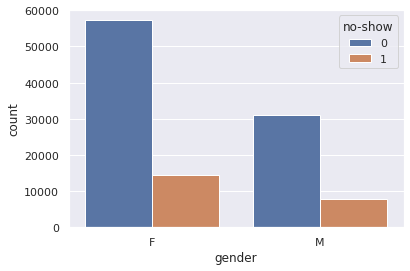

In [28]:
# Visualize teh no show baed on gender 
# 0 means they have shown and 1 didn't 
# Female appointments numbers grater than male appointments 
sns.set(style="darkgrid")
noshowbygender = sns.countplot(x= "gender", hue="no-show", data=df)

In [29]:
# Count of Female patients who show and didn't show for their appointments
df.query("gender=='F'")['no-show'].mean()

0.20314870752655242

In [30]:
# Count of Male patients who show and didn't show for their appointments
df.query("gender=='M'")['no-show'].mean()

0.19967947889471915

Groupby gender and age can idetify the majority of patients, in this situation groupby age and gender that show most our patients are adults. And most likley they have higher missing appointments rate.

In [31]:
# count by gender based on age group 
# You can see the majority are adults
df.groupby('age_group') ['gender'].value_counts()

age_group     gender
Toddler/baby  M          2046
              F          1845
Child         F         10332
              M          9617
Adult         F         49014
              M         20832
Elderly       F          8918
              M          4372
Name: gender, dtype: int64

In [32]:
# count the patients based on gender and their distribution on age group
df.groupby(['gender', 'age_group']) ['no-show'].count()

gender  age_group   
F       Toddler/baby     1845
        Child           10332
        Adult           49014
        Elderly          8918
M       Toddler/baby     2046
        Child            9617
        Adult           20832
        Elderly          4372
Name: no-show, dtype: int64

In [33]:
# count no-show of distribution on age group 
# 0 means they have shown and 1 didn't 
df.groupby('age_group') ['no-show'].value_counts()

age_group     no-show
Toddler/baby  0           3224
              1            667
Child         0          15258
              1           4691
Adult         0          55590
              1          14256
Elderly       0          11227
              1           2063
Name: no-show, dtype: int64

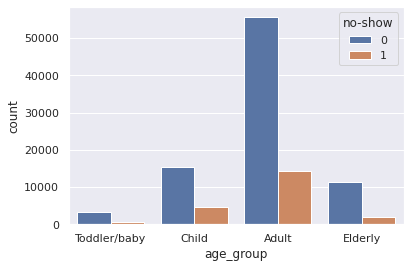

In [34]:
# count no-show of distribution on age group 
# 0 means they have shown and 1 didn't 
sns.set(style="darkgrid")
noshowbygender = sns.countplot(x= "age_group", hue="no-show", data=df)

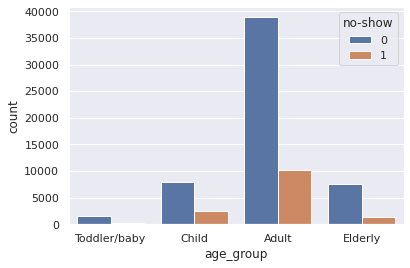

In [35]:
# By Female gender count no-show over age group 
# Adult Female are the most 
# 0 means they have shown and 1 didn't 
sns.set(style="darkgrid")
sns.countplot(data=df.loc[df['gender']=="F"], x='age_group', hue='no-show');

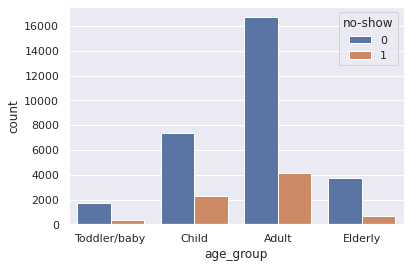

In [36]:
# By Male gender count no-show over age group 
# Adult Male are the most
# 0 means they have shown and 1 didn't
sns.set(style="darkgrid")
sns.countplot(data=df.loc[df['gender']=="M"], x='age_group', hue='no-show');

Adult group are the most of having appointments in hospital, so they have higher rate on missing their appointments. By comparing between genders I have noticed that female has higher rate than male of missing no-show for appointments.

In [37]:
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'age_group', 'scholarship', 'hipertension', 'diabetes', 'alcoholism',
       'handcap', 'sms_received', 'no-show'],
      dtype='object')

### Research Question 2: which age group have more diseases and disapilities? does it have impact on no-show?

In [38]:
# Show the head of dataframe 
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,age_group,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,Adult,0,1,0,0,0,0,0


In [39]:
# Count based on age group 
# 0 means they don't have hipertension and 1 they didn't 
df.groupby(['gender', 'age_group']) ['hipertension'].value_counts()

gender  age_group     hipertension
F       Toddler/baby  0                1845
        Child         0               10312
                      1                  20
        Adult         0               39195
                      1                9819
        Elderly       1                5499
                      0                3419
M       Toddler/baby  0                2046
        Child         0                9599
                      1                  18
        Adult         0               16872
                      1                3960
        Elderly       1                2484
                      0                1888
Name: hipertension, dtype: int64

From count you can notice that most of category have diagnosis with hypertension are adult and elderly. does this have relation with no-show?.

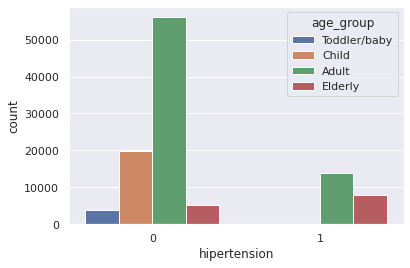

In [40]:
# Visualization based on two groups that shows where exactly hypertension distribute
# 0 means they don't have hipertension and 1 they didn't 
sns.set(style="darkgrid")
noshowbygender = sns.countplot(x= "hipertension", hue="age_group", data=df)

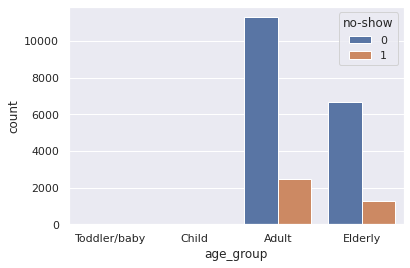

In [41]:
# Visualization were show attendance of patients with hipertension
# 0 means they have shown and 1 didn't
sns.set(style="darkgrid")
sns.countplot(data=df.loc[df['hipertension']==1], x='age_group', hue='no-show');

In this graph you can see that age group of Adult and Elderly have majority of hypertension diseases, ِAdult and Elderly have higher rate of not shown for their appointments. from previous question we find out adult have the higher rate of no-show for appointment. This mean hypertension has relation with adult age group for no-show for appointment. 

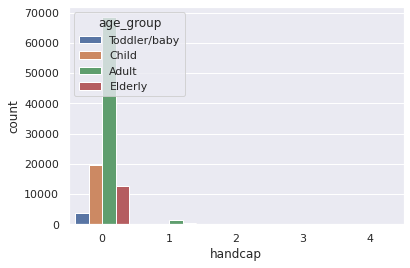

In [42]:
# Visualization based on two groups that shows where exactly handicap distribute
# 0 means they are not Handicap and 1 they are handicap 
sns.set(style="darkgrid")
noshowbygender = sns.countplot(x= "handcap", hue="age_group", data=df)

This graph show distribution between age group, the factor is handicap. it's very few so you will not have very clear reading.

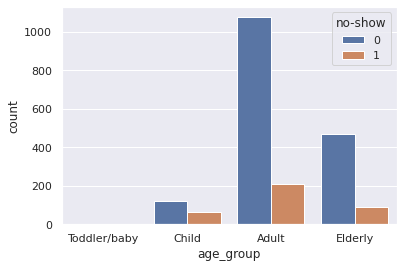

In [43]:
# Handicap based on  age group 
# 0 means they have shown and 1 didn't
sns.set(style="darkgrid")
sns.countplot(data=df.loc[df['handcap']==1], x='age_group', hue='no-show');

I have choose to visualize the only handicap cases, you can see very clear reading. the greatest are adult and elderly. They have higher rate of missing appointments.

### Research Question 3: which age group have more scholarship and received SMS? does it have impact on no-show?

In [44]:
# See the head of dataframe 
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,age_group,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,Adult,0,1,0,0,0,0,0


In [45]:
# Count sms recived based on age group
df.groupby(['age_group']) ['sms_received'].value_counts()

age_group     sms_received
Toddler/baby  0                2932
              1                 959
Child         0               13784
              1                6165
Adult         0               46383
              1               23463
Elderly       0                9294
              1                3996
Name: sms_received, dtype: int64

patients can receive more than one SMS messages for their appointments, from count you can see adults have heist rate of not receiving sms messages. this might have relation with no-show. 

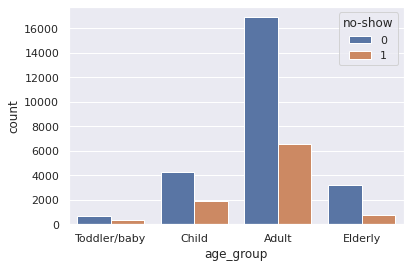

In [46]:
# Count ptients who receive one or more messages based on age group and no-show
# 0 means they have shown and 1 didn't
sns.set(style="darkgrid")
sns.countplot(data=df.loc[df['sms_received']>=1], x='age_group', hue='no-show');

The graph show that patients who received one or more sms messages, It seems like adult have high rate for no-show for appointment. there are high rate of patients who received sms message and didn't show for appointment in adult age group.

In [47]:
# Count based on age group who's in scholarship program and show or not to their appointments
# for scholarship 0 means they are not involve in program and 1 they are involved 
# in no-show 0 means they have shown and 1 didn't
df.groupby(['age_group','scholarship']) ['no-show'].value_counts()

age_group     scholarship  no-show
Toddler/baby  0            0           3050
                           1            640
              1            0            174
                           1             27
Child         0            0          13157
                           1           3983
              1            0           2101
                           1            708
Adult         0            0          49842
                           1          12456
              1            0           5748
                           1           1800
Elderly       0            0          11012
                           1           2027
              1            0            215
                           1             36
Name: no-show, dtype: int64

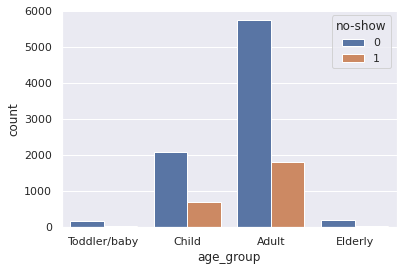

In [48]:
# Visualize based on age group and they are involoved in scholarship program 
# 0 means they have shown and 1 didn't 
sns.set(style="darkgrid")
sns.countplot(data=df.loc[df['scholarship']==1], x='age_group', hue='no-show');

patients with scholarship program mostly distributed on age group adult and child, those to groups have high rate of attending their appointments. But still there's a percentage of patients who are involved in the program and didn't show for the appointment.

<a id='conclusions'></a>
## Conclusions

At he end of this investigation, I would like to summarize my process and complete my finding. For the cleaning phase I have run through several process to make sure that data is ready to use and result will be clear be consumed. During exploration phase I have faced several obstacles to define test samples, so I come up with idea to categories the patients based on age. I look for this solution because it will be  understandable by audience. by applying this mechanism I come up with these observations.

1- Adults have high rate of missing appointments.

2- Adult Females have appointments more than males and they no-show for appointments higher than males.

3- hipertension rate is high within adult and elderly, and have the relationship with patients they no-show for appointment 

4- Handicap percentage is distribute between adult and elderly, but the impact on no show it seems like does not taken into consideration.

5- For SMS , Adult patients have received one or more sms and they didn't show for their appointments.

6- For scholarship program that Adults and children have greatest involved, Adults have higher rate of no-show for their appointments


Thank You, 
Fahad Alnuaimi